### Support Vector Machine

#### 1. 一般支持向量机

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

流程：
- 读取数据
- 构造实体
- fit
- 计算决策边界和间隔
$$
决策边界：w_0 x_0 + w_1 x_1 + b = 0\\
间隔： 1/w_1
$$

(0.0, 5.5, 0.0, 2.0)

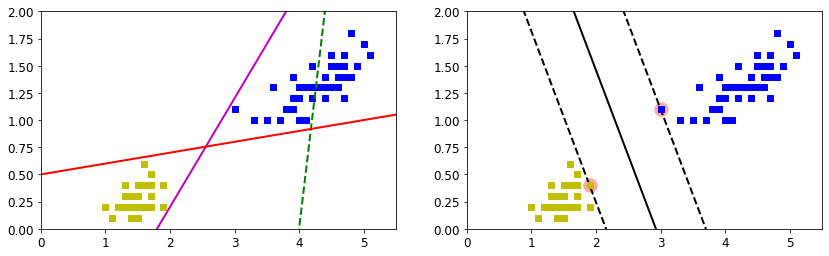

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

## 读取数据
# 读取水仙花数据
iris = datasets.load_iris()
# 选取所有样本的2和3两个特征
X = iris['data'][:,(2,3)]
# 读取标签
y = iris['target']
# 从三种水仙花标签中选择两种（因为SVM是二分类方法）
setosa_or_versicolor = (y==0)|(y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## 构造实体
# 线性、无软间隔SVM
svm_clf = SVC(kernel='linear',C=float('inf'))

## fit
svm_clf.fit(X,y)

## 一般的模型（用于对比）
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

## 计算决策边界和间隔
def plot_svc_decision_boundary(svm_clf, xmin, xmax,sv=True):
    # 计算w和b
    w = svm_clf.coef_[0]     
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    # 计算决策边界
    decision_boundary = - w[0]/w[1] * x0 - b/w[1] 
    # 计算间隔
    margin = 1/w[1]
    # 计算上下边界
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    # 如果sv=True，突出显示支持向量
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    # 画决策边界与上下边界
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)

## 画一般模型与SVM对比图
plt.figure(figsize=(14,4))
# 左图为一般模型
plt.subplot(121)
# 不同的水仙花种类用不同的标记
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.plot(x0,pred_1,'g--',linewidth=2)
plt.plot(x0,pred_2,'m-',linewidth=2)
plt.plot(x0,pred_3,'r-',linewidth=2)
plt.axis([0,5.5,0,2])
# 右图为SVM
plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
# 不同的水仙花种类用不同的标记
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])

#### 2. 软间隔支持向量机
可以使用**超参数C**控制软间隔程度
- 在右侧，使用较高的C值，分类器会减少误分类，但最终会有较小间隔。
- 在左侧，使用较低的C值，间隔要大得多，但很多实例最终会出现在间隔之内。

流程：
- 读取数据
- 标准化
- 构造实体
- fit
- 计算决策边界和间隔

(4.0, 6.0, 0.8, 2.8)

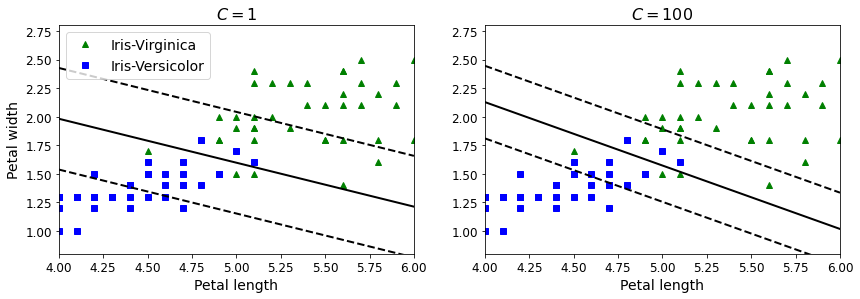

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## 读取数据
# 读取水仙花数据
iris=datasets.load_iris()
# 选取所有样本的2和3两个特征
X = iris["data"][:,(2,3)]
# 从三种水仙花标签中选择两种（因为SVM是二分类方法）
y = (iris["target"] == 2).astype(np.float64) # Iris-Viginica

## 标准化 & 构造实体
# 此处使用sklearn的并行处理，同时标准化和线性SVM
# 对比不同C值带来的效果差异
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, random_state = 42)
svm_clf2 = LinearSVC(C=100, random_state = 42)
scaled_svm_clf1 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf1)
))  
scaled_svm_clf2 = Pipeline((
    ('std',scaler),
    ('linear_svc',svm_clf2)
)) 

## fit
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y) 

## 计算决策边界和间隔
# 计算w和b
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

## 画不同C值的SVM对比图
plt.figure(figsize=(14,4.2))
# 左图为C=1时的图
plt.subplot(121)
# 不同的水仙花种类用不同的标记
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])
# 右图为C=100时的图
plt.subplot(122)
# 不同的水仙花种类用不同的标记
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6,sv=False)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

#### 3. 非线性支持向量机
流程：
- 读取数据
- 低维不可分变成高维可分
- 标准化
- 构造实体
- fit
- 计算决策边界

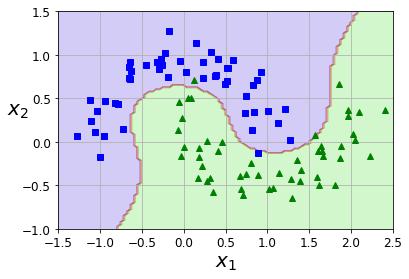

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## 读取数据
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

## 画出原始数据
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

## 低维不可分变成高维可分 & 标准化 & 构造实体
polynomial_svm_clf=Pipeline((("poly_features",PolynomialFeatures(degree=3)),
                            ("scaler",StandardScaler()),
                            ("svm_clf",LinearSVC(C=10,loss="hinge"))
                            ))

## fit
polynomial_svm_clf.fit(X,y)

## 计算决策边界
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])

#### 4. SVM中的核函数应用-Poly
流程：
- 读取数据
- 标准化
- 构造实体
- fit
- 计算决策边界

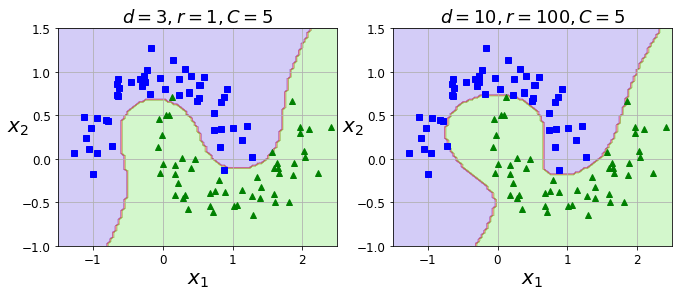

In [14]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## 读取数据
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

## 标准化 & 构造实体
# 对比不同degree和偏置项coef0
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

## fit
poly_kernel_svm_clf.fit(X, y)
poly100_kernel_svm_clf.fit(X, y)

## 计算决策边界
plt.figure(figsize=(11, 4))
# 左图
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
# 右图
plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

#### 5. SVM中的核函数应用-高斯核函数
- 利用相似度来变换特征

* 选择一份一维数据集，并在 $x_1 = -2$ 和 $x_1 = 1$ 处为其添加两个高斯函数。
* 接下来，让我们将相似度函数定义为 $γ= 0.3$ 的径向基函数（RBF）
![title](./img/5.png)

例如：**$x_1 = -1$** ：它位于距第一个地标距离为**1**的地方，距第二个地标距离为 **2**。因此，其新特征是 $x_2 = exp（-0.3×1^2）≈0.74$ 并且 $x_3 = exp（-0.3×2^2）≈0.30$。
![title](./img/6.png)

流程：
- 读取数据
- 标准化
- 构造实体
- fit
- 计算决策边界

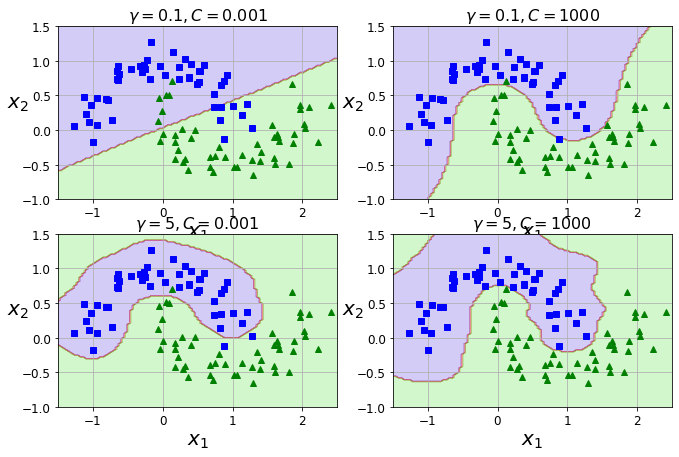

In [17]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## 读取数据
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

## 标准化 & 构造实体 & fit
# 对比不同gamma和C
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)
# 遍历每个组合
svm_clfs = []
for gamma, C in hyperparams:
    # 标准化 & 构造实体
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    # fit
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
## 计算决策边界
plt.figure(figsize=(11, 7))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
plt.show()